# Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score


# Read data

In [2]:
df = pd.read_csv("student_feedback.csv")
df

,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9
...,...,...,...,...,...,...,...,...,...,...
996,996,55,8,7,6,2,5,7,7,9
997,997,913,5,5,6,5,6,7,6,1
998,998,199,9,5,8,3,8,1,1,2
999,999,539,10,2,7,4,3,4,10,1


In [4]:
df.isnull().sum()

Unnamed: 0                                              0
Student ID                                              0
Well versed with the subject                            0
Explains concepts in an understandable way              0
Use of presentations                                    0
Degree of difficulty of assignments                     0
Solves doubts willingly                                 0
Structuring of the course                               0
Provides support for students going above and beyond    0
Course recommendation based on relevance                0
dtype: int64

In [5]:
df.describe

<bound method NDFrame.describe of       Unnamed: 0  Student ID  Well versed with the subject  \
0              0         340                             5   
1              1         253                             6   
2              2         680                             7   
3              3         806                             9   
4              4         632                             8   
...          ...         ...                           ...   
996          996          55                             8   
997          997         913                             5   
998          998         199                             9   
999          999         539                            10   
1000        1000         759                             7   

      Explains concepts in an understandable way  Use of presentations  \
0                                              2                     7   
1                                              5                     8   

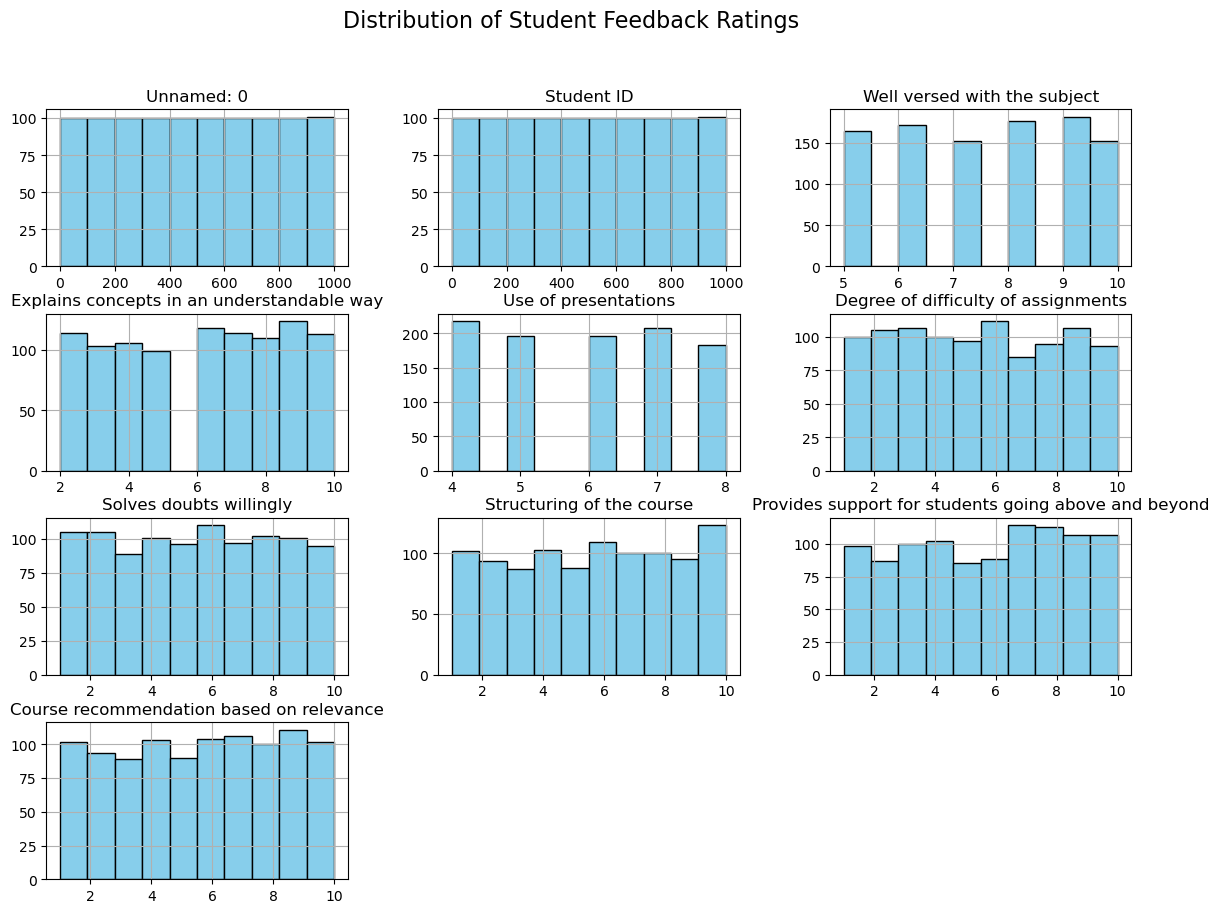

In [12]:
# Distribution of ratings
df.hist(bins=10, figsize=(14, 10), color="skyblue", edgecolor="black")
plt.suptitle("Distribution of Student Feedback Ratings", fontsize=16)
plt.show()

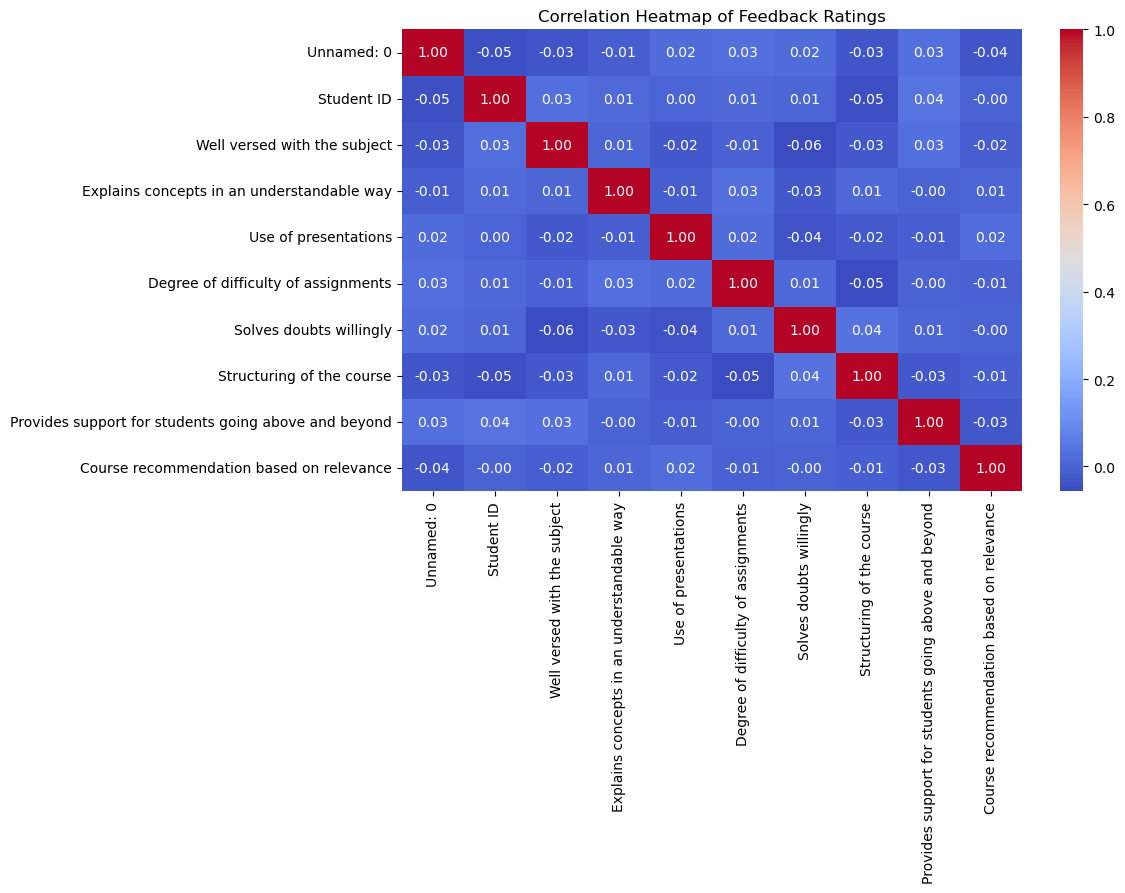

In [14]:
# Correlation matrics
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Feedback Ratings")
plt.show()


# Predict Model

In [29]:
X = df.drop("Course recommendation based on relevance", axis=1)
y = df["Course recommendation based on relevance"]

In [31]:
y_binary = (y >= 6).astype(int)

# # Train,Test,split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)


# Train a DecisionTree Classifier

In [33]:
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

In [34]:
# Prediction
y_pred = clf.predict(X_test)

In [35]:
# Model evaluation
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Model Accuracy: 0.43781094527363185

Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.26      0.30        94
           1       0.48      0.60      0.53       107

    accuracy                           0.44       201
   macro avg       0.42      0.43      0.41       201
weighted avg       0.42      0.44      0.42       201



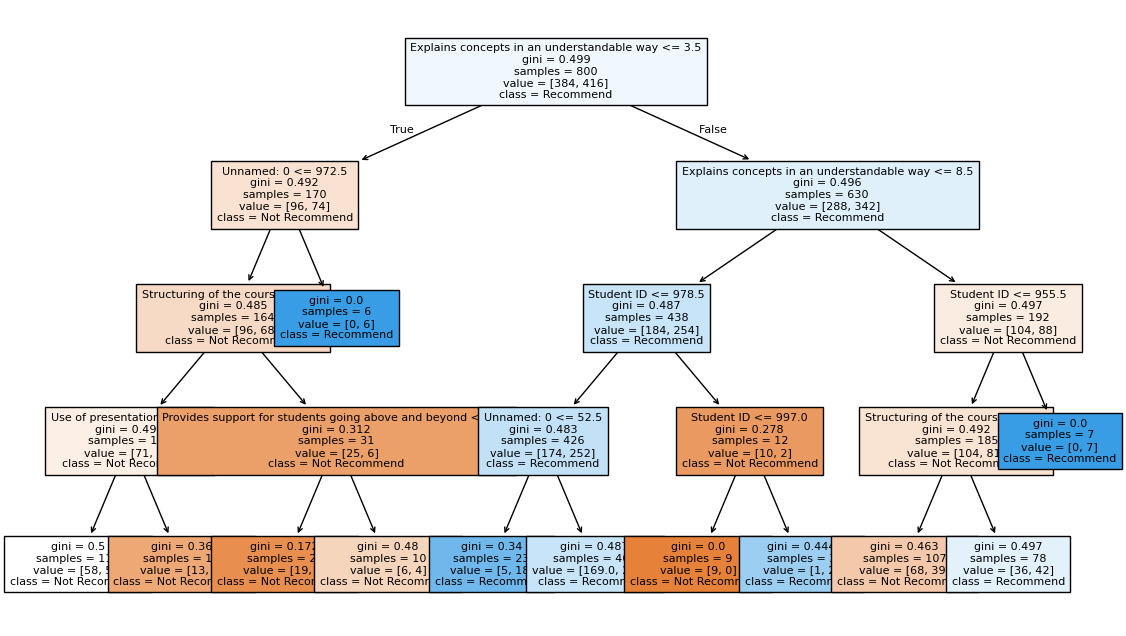

In [36]:
# Visualization Decision Tree
plt.figure(figsize=(14, 8))
plot_tree(clf, feature_names=X.columns, class_names=["Not Recommend", "Recommend"], filled=True, fontsize=8)
plt.show()